In [283]:
class Value:
    def __init__(self, data=0, ops='', children=()):
        self.data = data
        self.grad = 0
        self.ops = ops
        self._backward = lambda: None
        self.children = children

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, '+', (self, other))

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, '*', (self, other))

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out

    def zero_grad(self):
        self.grad = 0
        for child in self.children:
            child.zero_grad()

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v.children:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for v in reversed(topo):
            v._backward()

    def __repr__(self):
        return f"Value(data={self.data}, grad={self.grad})"


In [231]:
from graphviz import Digraph

In [284]:
def build_graph(value, graph=None):
    if graph is None:
        graph = Digraph()

    # Add the current node
    node_label = f'{value.ops} (Value: {value.data})' + f' grad: {value.grad}' if value.ops else f'Value: {value.data}' + f' grad: {value.grad}'
    graph.node(name=str(value.data), label=node_label)

    # Add nodes and edges for children, if they exist
    for child in value.children:
        graph.edge(str(child.data), str(value.data))
        build_graph(child, graph)

    return graph

In [285]:
a = Value(2)
b = Value(3)
c = a * b 

d = Value(10)
e = c * d 

f = Value(5)
g = d * f 

h = e + g

i = Value(4)
j = h * i

k = Value(7)
l = j * k 

m = Value(8)
n = l * m 

n.backward()

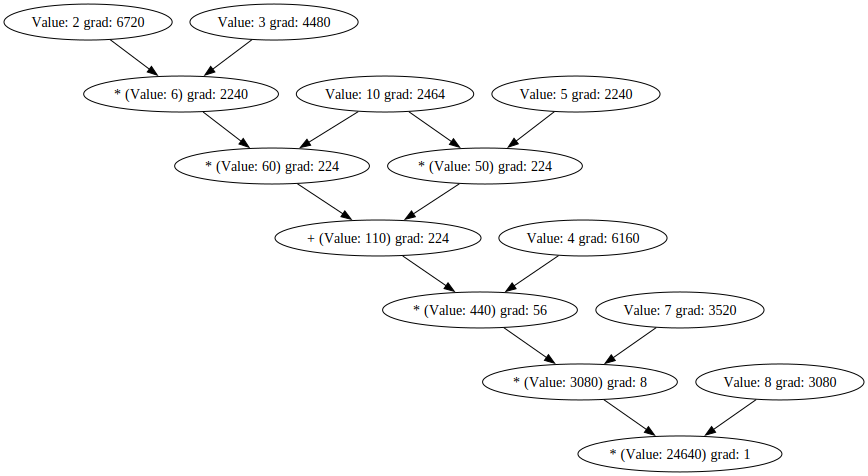

In [286]:
dot = build_graph(n)
dot